<a href="https://colab.research.google.com/github/goyetc/color_picker/blob/master/CG2970_HW4_2_adl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CG2970 - HW4 - Part 2
* Note that two models were tried, a dense model and an LSTM. 
* The LSTM outperformed the dense model slightly, but not in a significant manner - both models accurately predicted a color (as seen below, at the end) from simple names. 

In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 59kB/s 
    100% |████████████████████████████████| 419kB 11.0MB/s 
    100% |████████████████████████████████| 3.0MB 7.5MB/s 
    100% |████████████████████████████████| 61kB 19.6MB/s 


In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
# Download the colors dataset
if not os.path.exists('colors.csv'):
  !curl -O 'https://raw.githubusercontent.com/random-forests/datasets/master/colors.csv'
!head colors.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  323k  100  323k    0     0  1499k      0 --:--:-- --:--:-- --:--:-- 1499k
name,red,green,blue
parakeet,174,182,87
saddle brown,88,52,1
cucumber crush,222,237,215
pool blue,134,194,201
distance,98,110,130
light urple,179,111,246
east side,172,145,206
florida seashells,250,228,199
paris,145,167,189


In [0]:
# Read the data
colors_rgb = []
csv_reader = csv.reader(open('colors.csv'), delimiter=',')
next(csv_reader) # Remove the header
for row in csv_reader:
    name, r, g, b = row[0].lower().strip(), float(row[1]) / 255.0, float(row[2]) / 255.0, float(row[3]) / 255.0
    colors_rgb.append((name, r, g, b))
print(len(colors_rgb), 'colors downloaded')
print('For example', colors_rgb[0])

14157 colors downloaded
For example ('parakeet', 0.6823529411764706, 0.7137254901960784, 0.3411764705882353)


In [0]:
names = [item[0] for item in colors_rgb]

In [0]:
names

In [0]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = pad_sequences(tokenized, maxlen=maxlen)
padded_names = padded_names.astype('float32')

vocab_size = len(t.word_index) + 1

In [0]:
r = [item[1] for item in colors_rgb]
g = [item[2] for item in colors_rgb]
b = [item[3] for item in colors_rgb]
targets = np.column_stack([r, g, b])

In [0]:
targets[:10,:]

array([[0.68235294, 0.71372549, 0.34117647],
       [0.34509804, 0.20392157, 0.00392157],
       [0.87058824, 0.92941176, 0.84313725],
       [0.5254902 , 0.76078431, 0.78823529],
       [0.38431373, 0.43137255, 0.50980392],
       [0.70196078, 0.43529412, 0.96470588],
       [0.6745098 , 0.56862745, 0.80784314],
       [0.98039216, 0.89411765, 0.78039216],
       [0.56862745, 0.65490196, 0.74117647],
       [0.96862745, 0.84313725, 0.84313725]])

In [0]:
#import random
#print(random.sample(padded_names,10))
padded_names[0:4]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  2.,  3.,  2., 21.,  1.,  1.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  2., 13., 13.,  7.,  1.,  4., 18.,  3.,  8., 20.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,
        11., 12., 17., 18.,  1.,  3.,  4., 11.,  3., 12., 10., 16.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 15.,  8.,  8.,  7.,  4., 18.,  7., 12.,  1.]],
      dtype=float32)

In [0]:
# Improve me!
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1, maxlen), input_shape=(maxlen,)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile('adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 1, 25)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)              

In [0]:
# it's fine if your model massively overfits to the training
# set for thsi experiment
history = model.fit(padded_names, targets, epochs=15, validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/15
12741/12741 [==============================] - 3s 219us/sample - loss: 0.1463 - accuracy: 0.5117 - val_loss: 0.1345 - val_accuracy: 0.5925
Epoch 2/15
12741/12741 [==============================] - 3s 205us/sample - loss: 0.1401 - accuracy: 0.6116 - val_loss: 0.1338 - val_accuracy: 0.6398
Epoch 3/15
12741/12741 [==============================] - 3s 203us/sample - loss: 0.1394 - accuracy: 0.6348 - val_loss: 0.1336 - val_accuracy: 0.6419
Epoch 4/15
12741/12741 [==============================] - 3s 203us/sample - loss: 0.1390 - accuracy: 0.6454 - val_loss: 0.1332 - val_accuracy: 0.6462
Epoch 5/15
12741/12741 [==============================] - 3s 203us/sample - loss: 0.1387 - accuracy: 0.6547 - val_loss: 0.1330 - val_accuracy: 0.6631
Epoch 6/15
12741/12741 [==============================] - 3s 203us/sample - loss: 0.1384 - accuracy: 0.6577 - val_loss: 0.1330 - val_accuracy: 0.6645
Epoch 7/15
12741/12741 [===========================

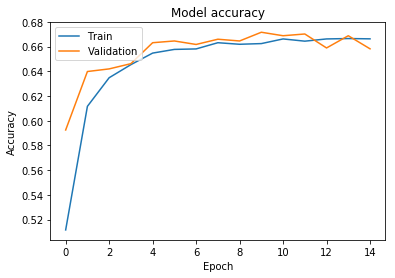

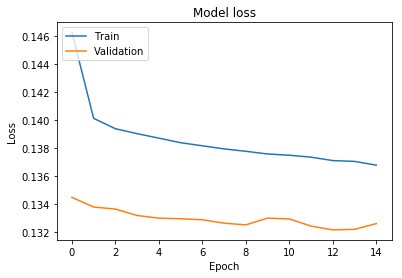

In [0]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [0]:
# Improve me!
model_RNN = tf.keras.Sequential()
model_RNN.add(tf.keras.layers.Reshape((1, maxlen), input_shape=(maxlen,)))

model_RNN.add(tf.keras.layers.LSTM(32))
model_RNN.add(tf.keras.layers.Flatten())

model_RNN.add(tf.keras.layers.Dense(128, activation = 'relu'))
model_RNN.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_RNN.add(tf.keras.layers.Dropout(0.2))

model_RNN.add(tf.keras.layers.Dense(3, activation='softmax'))

model_RNN.compile('adam', loss='mse',metrics=['accuracy'])
model_RNN.summary()

W0413 21:29:50.082586 139812786308992 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f27c966c6d8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 1, 25)             0         
_________________________________________________________________
unified_lstm_2 (UnifiedLSTM) (None, 32)                7424      
_________________________________________________________________
flatten_14 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 3)               

In [0]:
# it's fine if your model massively overfits to the training
# set for thsi experiment
history_RNN = model_RNN.fit(padded_names, targets, epochs=10, validation_split = 0.05)

Train on 13449 samples, validate on 708 samples
Epoch 1/10
13449/13449 [==============================] - 3s 237us/sample - loss: 0.1353 - accuracy: 0.6703 - val_loss: 0.1323 - val_accuracy: 0.6511
Epoch 2/10
13449/13449 [==============================] - 3s 223us/sample - loss: 0.1351 - accuracy: 0.6701 - val_loss: 0.1328 - val_accuracy: 0.6681
Epoch 3/10
13449/13449 [==============================] - 3s 220us/sample - loss: 0.1350 - accuracy: 0.6719 - val_loss: 0.1322 - val_accuracy: 0.6737
Epoch 4/10
13449/13449 [==============================] - 3s 220us/sample - loss: 0.1348 - accuracy: 0.6709 - val_loss: 0.1327 - val_accuracy: 0.6766
Epoch 5/10
13449/13449 [==============================] - 3s 224us/sample - loss: 0.1346 - accuracy: 0.6750 - val_loss: 0.1328 - val_accuracy: 0.6709
Epoch 6/10
13449/13449 [==============================] - 3s 222us/sample - loss: 0.1345 - accuracy: 0.6707 - val_loss: 0.1328 - val_accuracy: 0.6737
Epoch 7/10
13449/13449 [============================

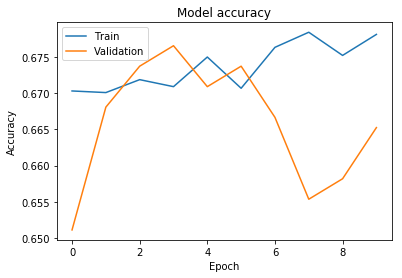

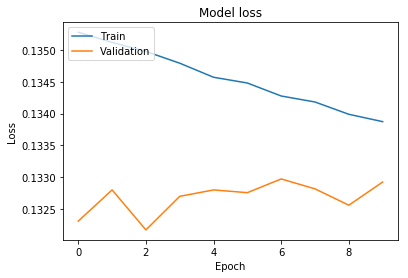

In [0]:
# Plot training & validation accuracy values
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [0]:
# plots a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [0]:
def scale(n):
    return int(n * 255)

In [0]:
def predict(name):
    tokenized = t.texts_to_sequences([name])
    padded = pad_sequences(tokenized, maxlen=maxlen)
    padded = padded.astype('float32')
    pred = model_RNN.predict(np.array(padded))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

red, R,G,B: 177 49 28


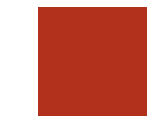

green, R,G,B: 52 124 77


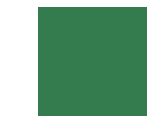

blue, R,G,B: 26 79 148


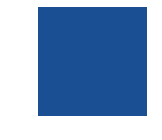

yellow, R,G,B: 128 122 3


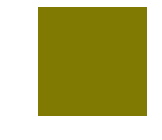

light blue, R,G,B: 30 85 138


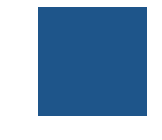

dark blue, R,G,B: 32 78 144


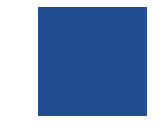

tensorflow orange, R,G,B: 133 78 43


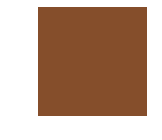

In [0]:
# Hopefully this will improve with your updated model
predict("red")
predict("green")
predict("blue")
predict("yellow")
predict("light blue")
predict("dark blue")
predict("tensorflow orange")

In [0]:
east side,172,145,206
florida seashells,250,228,199
paris,145,167,189
cucumber crush,222,237,215